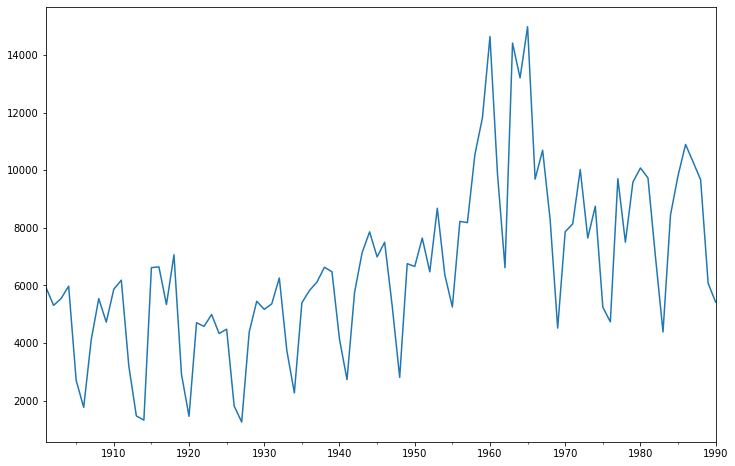

AIC:1619.6322648256676


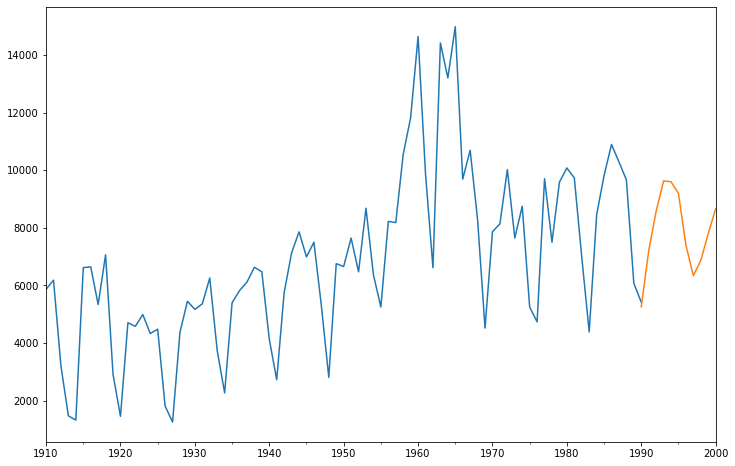

In [19]:
# 一段ARMA练习
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot
from pandas import Series,DataFrame
import warnings
warnings.filterwarnings('ignore')

# 创建数据
data = [5922, 5308, 5546, 5975, 2704, 1767, 4111, 5542, 4726, 5866, 6183, 3199, 1471, 1325, 6618, 6644, 5337, 7064, 2912, 1456, 4705, 4579, 4990, 4331, 4481, 1813, 1258, 4383, 5451, 5169, 5362, 6259, 3743, 2268, 5397, 5821, 6115, 6631, 6474, 4134, 2728, 5753, 7130, 7860, 6991, 7499, 5301, 2808, 6755, 6658, 7644, 6472, 8680, 6366, 5252, 8223, 8181, 10548, 11823, 14640, 9873, 6613, 14415, 13204, 14982, 9690, 10693, 8276, 4519, 7865, 8137, 10022, 7646, 8749, 5246, 4736, 9705, 7501, 9587, 10078, 9732, 6986, 4385, 8451, 9815, 10894, 10287, 9666, 6072, 5418]
data = Series(data)
data
data_index = sm.tsa.datetools.dates_from_range('1901','1990')

# 绘制数据图
data.index = pd.Index(data_index)
data.plot(figsize=(12,8))
plt.show()

# 创建ARMA模型
arma = ARMA(data, (7,0)).fit()
print(f'AIC:{arma.aic}')

# 模型预测
pred_y = arma.predict('1990','2000')

# 预测结果绘制
fig, ax = plt.subplots(figsize=(12,8))
ax = data['1910':].plot(ax=ax)
pred_y.plot(ax=ax)
plt.show()

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')


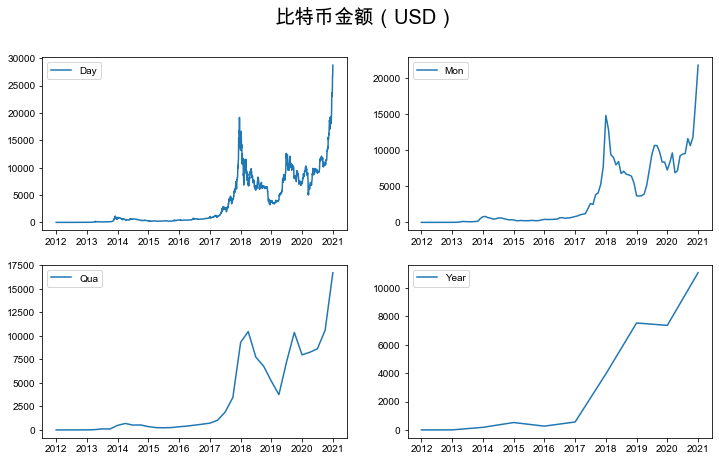

参数错误:(1, 1)
参数错误:(1, 2)
参数错误:(2, 1)
参数错误:(2, 2)
result_table:        0            1
0  (0, 0)  2146.538383
1  (0, 1)  2027.106477
2  (0, 2)  1964.359816
3  (1, 0)  1876.305779
4  (2, 0)  1865.746941
最优模型:                              ARMA Model Results                              
Dep. Variable:         Weighted_Price   No. Observations:                  109
Model:                     ARMA(2, 0)   Log Likelihood                -928.873
Method:                       css-mle   S.D. of innovations           1192.748
Date:                Fri, 01 Jan 2021   AIC                           1865.747
Time:                        00:24:40   BIC                           1876.512
Sample:                    12-31-2011   HQIC                          1870.113
                         - 12-31-2020                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------

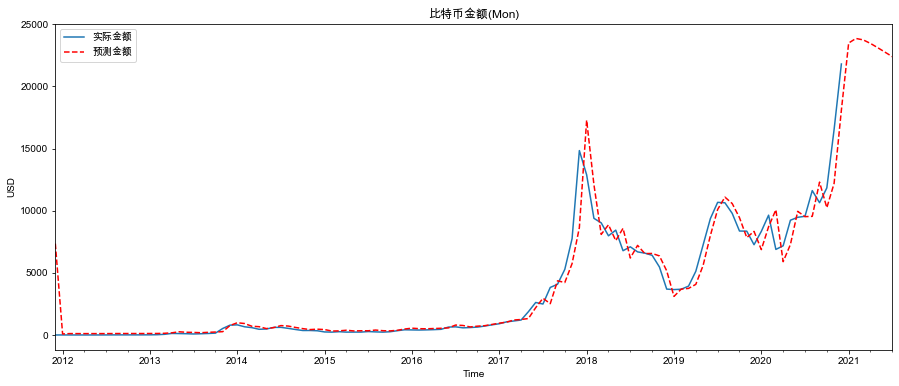

In [110]:
# -*- coding: utf-8 -*-
# 预测比特币走势
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime
from pandas import Series,DataFrame
warnings.filterwarnings('ignore')

# 数据加载
df = pd.read_csv('data/bitcoin.csv')

# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp

# 数据探索
# print(df.head())
print(df.columns)
# print(df.shape)
# print(df.describe())


# 按照月，季度，年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()

# 按照天、月、季度、年来展示比特币的走势
fig = plt.figure(figsize=(12,7))

# 正常显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

plt.suptitle('比特币金额（USD）', fontsize=20)
plt.subplot(221)
plt.plot(df.Weighted_Price, '-', label='Day')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Weighted_Price, '-', label='Mon')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Weighted_Price, '-', label='Qua')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Weighted_Price, '-', label="Year")
plt.legend()
plt.show()

# 设置参数范围
ps = range(0,3)
qs = range(0,3)
parameters = product(ps, qs)
parameters_list = list(parameters)


# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float('inf') # 正无穷

for param in parameters_list:
    try:
        model = ARMA(df_month.Weighted_Price, order=(param[0], param[1])).fit()
    except ValueError:
        print(f'参数错误:{param}')
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

# 输出最优模型
result_table = pd.DataFrame(results)
print(f'result_table:{result_table}')

result_table.columns = ['parameters','aic']
print(f'最优模型:{best_model.summary()}')

# 比特币预测
df_month2 = df_month[['Weighted_Price']]
date_list = [datetime(2021, 1, 31), datetime(2021, 2, 28), datetime(2021, 3, 31), 
             datetime(2021, 4, 30), datetime(2021, 5, 31), datetime(2021, 6, 30),datetime(2021,7,31)]

future = pd.DataFrame(index=date_list, columns= df_month.columns)
print(f'future:{future}')
df_month2 = pd.concat([df_month2,future])
print(f'df_month2:{df_month2}')
df_month2.to_excel('~/Downloads/2.xlsx')
df_month2['forecast'] = best_model.predict(start=0, end=116)
df_month2.to_excel('~/Downloads/3.xlsx')

# 比特币预测结果显示
plt.figure(figsize=(15,6))
df_month2.Weighted_Price.plot(label='实际金额')
df_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('比特币金额(Mon)')
plt.xlabel('Time')
plt.ylabel('USD')
plt.show()

            Timestamp      Price
Timestamp                       
1990-12-19 1990-12-19    96.0500
1990-12-20 1990-12-20   104.3000
1990-12-21 1990-12-21   109.0700
1990-12-24 1990-12-24   113.5700
1990-12-25 1990-12-25   120.0900
...               ...        ...
2019-02-22 2019-02-22  2749.4615
2019-02-25 2019-02-25  2838.3896
2019-02-26 2019-02-26  2969.0976
2019-02-27 2019-02-27  2939.9287
2019-02-28 2019-02-28  2950.0548

[6893 rows x 2 columns]


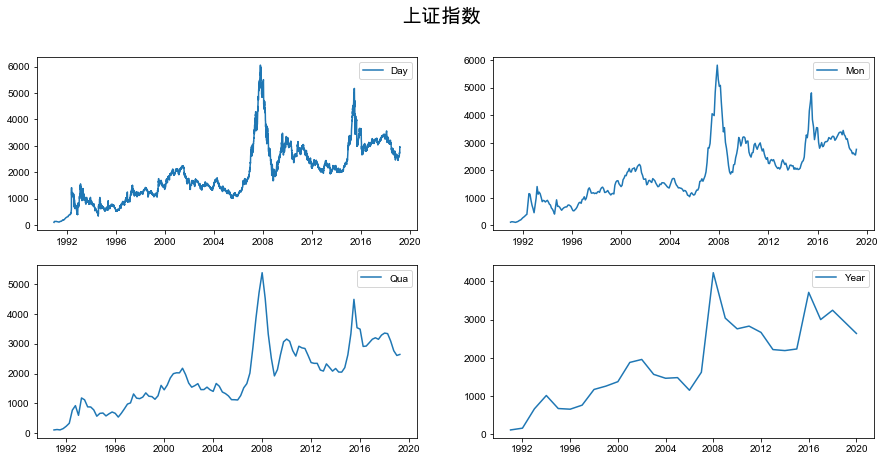

参数错误: (0, 2)
最优模型:                               ARMA Model Results                              
Dep. Variable:                  Price   No. Observations:                  339
Model:                     ARMA(2, 2)   Log Likelihood               -2208.110
Method:                       css-mle   S.D. of innovations            162.159
Date:                Fri, 01 Jan 2021   AIC                           4428.219
Time:                        19:31:54   BIC                           4451.175
Sample:                    12-31-1990   HQIC                          4437.367
                         - 02-28-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1841.3635    489.610      3.761      0.000     881.746    2800.981
ar.L1.Price     0.5138      0.130      3.959      0.000       0.259       0.768
ar.L2.Price     0.4501      0

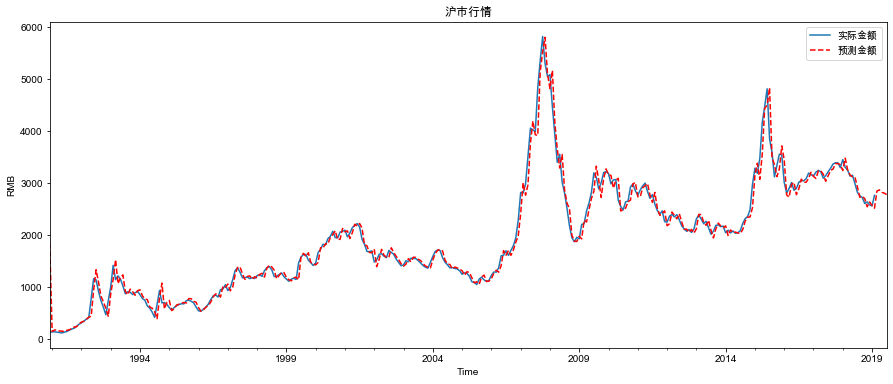

In [130]:
# 作业：沪市行情走势预测
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
import warnings
from itertools import product
from datetime import datetime

warnings.filterwarnings('ignore')

# 数据加载
df = pd.read_csv('data/huzhi.csv')

# 将时间作为df的索引
df.Timestamp = pd.to_datetime(df.Timestamp)
df.index = df.Timestamp

# 数据探索
print(df)

# 按照月、季度、年来统计
df_month = df.resample('M').mean()
df_Q = df.resample('Q-DEC').mean()
df_year = df.resample('A-DEC').mean()

# 显示沪市走势
fig = plt.figure(figsize=[15,7])

# 正常显示中文
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 正常显示中文
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

plt.suptitle('上证指数', fontsize=20)
plt.subplot(221)
plt.plot(df.Price, '-', label='Day')
plt.legend()
plt.subplot(222)
plt.plot(df_month.Price, '-', label='Mon')
plt.legend()
plt.subplot(223)
plt.plot(df_Q.Price, '-', label='Qua')
plt.legend()
plt.subplot(224)
plt.plot(df_year.Price, '-', label="Year")
plt.legend()
plt.show()

# 设置参数范围
ps = range(0,3)
qs = range(0,3)
parameters = product(ps,qs)
parameters_list = list(parameters)

# 寻找最优ARMA模型参数
result = []
best_aic = float('inf')
for param in parameters_list:
    try:
        model = ARMA(df_month.Price, order=(param[0],param[1])).fit()
    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])


# 输出最优模型
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
result_table.to_excel('~/Downloads/result_table.xlsx')
print('最优模型:', best_model.summary())

# 沪市预测
df_month2 = df_month[['Price']]
date_list = [datetime(2019, 3, 31), datetime(2019, 4, 30), datetime(2019, 5, 31), datetime(2019, 6, 30),datetime(2019,7,31)]

future = pd.DataFrame(index=date_list, columns= df_month.columns)
print(f'future:{future}')
df_month2 = pd.concat([df_month2,future])
print(f'df_month2:{df_month2}')
df_month2.to_excel('~/Downloads/2.xlsx')
df_month2['forecast'] = best_model.predict(start=0, end=345)
df_month2.to_excel('~/Downloads/3.xlsx')

# 沪市预测结果显示
plt.figure(figsize=(15,6))
df_month2.Price.plot(label='实际金额')
df_month2.forecast.plot(color='r', ls='--', label='预测金额')
plt.legend()
plt.title('沪市行情')
plt.xlabel('Time')
plt.ylabel('RMB')
plt.show()